# Prédiction de remboursement prêt en utilisant le machine learning

#### Objectif : Prédire si un client va rembourser son prêt

## Importation des packages

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Chargement et exploration de données

In [ ]:
df = pd.read_csv("../data/data.csv")

In [7]:
## Affichage des 5 premieres lignes
df.head()

,id,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,gender,marital_status,education_level,employment_status,loan_purpose,grade_subgrade,loan_paid_back
0,0,29367.99,0.084,736,2528.42,13.67,Female,Single,High School,Self-employed,Other,C3,1.0
1,1,22108.02,0.166,636,4593.10,12.92,Male,Married,Master's,Employed,Debt consolidation,D3,0.0
2,2,49566.20,0.097,694,17005.15,9.76,Male,Single,High School,Employed,Debt consolidation,C5,1.0
3,3,46858.25,0.065,533,4682.48,16.10,Female,Single,High School,Employed,Debt consolidation,F1,1.0
4,4,25496.70,0.053,665,12184.43,10.21,Male,Married,High School,Employed,Other,D1,1.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593994 entries, 0 to 593993
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    593994 non-null  int64  
 1   annual_income         593994 non-null  float64
 2   debt_to_income_ratio  593994 non-null  float64
 3   credit_score          593994 non-null  int64  
 4   loan_amount           593994 non-null  float64
 5   interest_rate         593994 non-null  float64
 6   gender                593994 non-null  object 
 7   marital_status        593994 non-null  object 
 8   education_level       593994 non-null  object 
 9   employment_status     593994 non-null  object 
 10  loan_purpose          593994 non-null  object 
 11  grade_subgrade        593994 non-null  object 
 12  loan_paid_back        593994 non-null  float64
dtypes: float64(5), int64(2), object(6)
memory usage: 58.9+ MB


### Description des variables
- id : Identifiant unique pour chaque prêt ou emprunteur.
- annual_income : Revenu annuel de l’emprunteur, en unité monétaire.
- debt_to_income_ratio : Ratio dette/revenu, c’est-à-dire la part du revenu mensuel utilisée pour rembourser les dettes.
- credit_score : Score de crédit de l’emprunteur, généralement entre 300 et 850, reflétant la fiabilité financière.
- loan_amount : Montant total du prêt demandé par l’emprunteur.
- interest_rate : Taux d’intérêt appliqué au prêt, exprimé en pourcentage.
- gender : Genre de l’emprunteur (ex. : male, female).- marital_status : Statut marital de l’emprunteur (ex. : single, married).
- education_level : Niveau d’éducation de l’emprunteur (ex. : high school, bachelor, master).
- employment_status : Situation professionnelle de l’emprunteur (ex. : employed, self-employed, unemployed).
- loan_purpose : Objectif du prêt (ex. : home, car, education).
- grade_subgrade : Classification interne du prêt, souvent utilisée par les banques pour évaluer le risque (ex. : A1, B2…).
- loan_paid_back : Variable cible indiquant si le prêt a été remboursé (1 = oui, 0 = non, ou un pourcentage selon votre dataset).

## Analyses descriptives

In [9]:
# Statistiques descriptives des variables quantitatives
df.describe()

,id,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,loan_paid_back
count,593994.000000,593994.000000,593994.000000,593994.000000,593994.000000,593994.000000,593994.000000
mean,296996.500000,48212.202976,0.120696,680.916009,15020.297629,12.356345,0.798820
std,171471.442235,26711.942078,0.068573,55.424956,6926.530568,2.008959,0.400883
min,0.000000,6002.430000,0.011000,395.000000,500.090000,3.200000,0.000000
25%,148498.250000,27934.400000,0.072000,646.000000,10279.620000,10.990000,1.000000
50%,296996.500000,46557.680000,0.096000,682.000000,15000.220000,12.370000,1.000000
75%,445494.750000,60981.320000,0.156000,719.000000,18858.580000,13.680000,1.000000
max,593993.000000,393381.740000,0.627000,849.000000,48959.950000,20.990000,1.000000


In [10]:
# Statistiques descriptives des variables qualitatives
df.describe(include='object')

,gender,marital_status,education_level,employment_status,loan_purpose,grade_subgrade
count,593994,593994,593994,593994,593994,593994
unique,3,4,5,5,8,30
top,Female,Single,Bachelor's,Employed,Debt consolidation,C3
freq,306175,288843,279606,450645,324695,58695


In [11]:
# Analyse des valeurs manquantes
print("Valeurs manquantes : ", df.isnull().sum().sum())

# Analyse des doublons
print("Valeurs doublons : ", df.duplicated().sum())

Valeurs manquantes :  0
Valeurs doublons :  0


### Visualisation des variables numériques

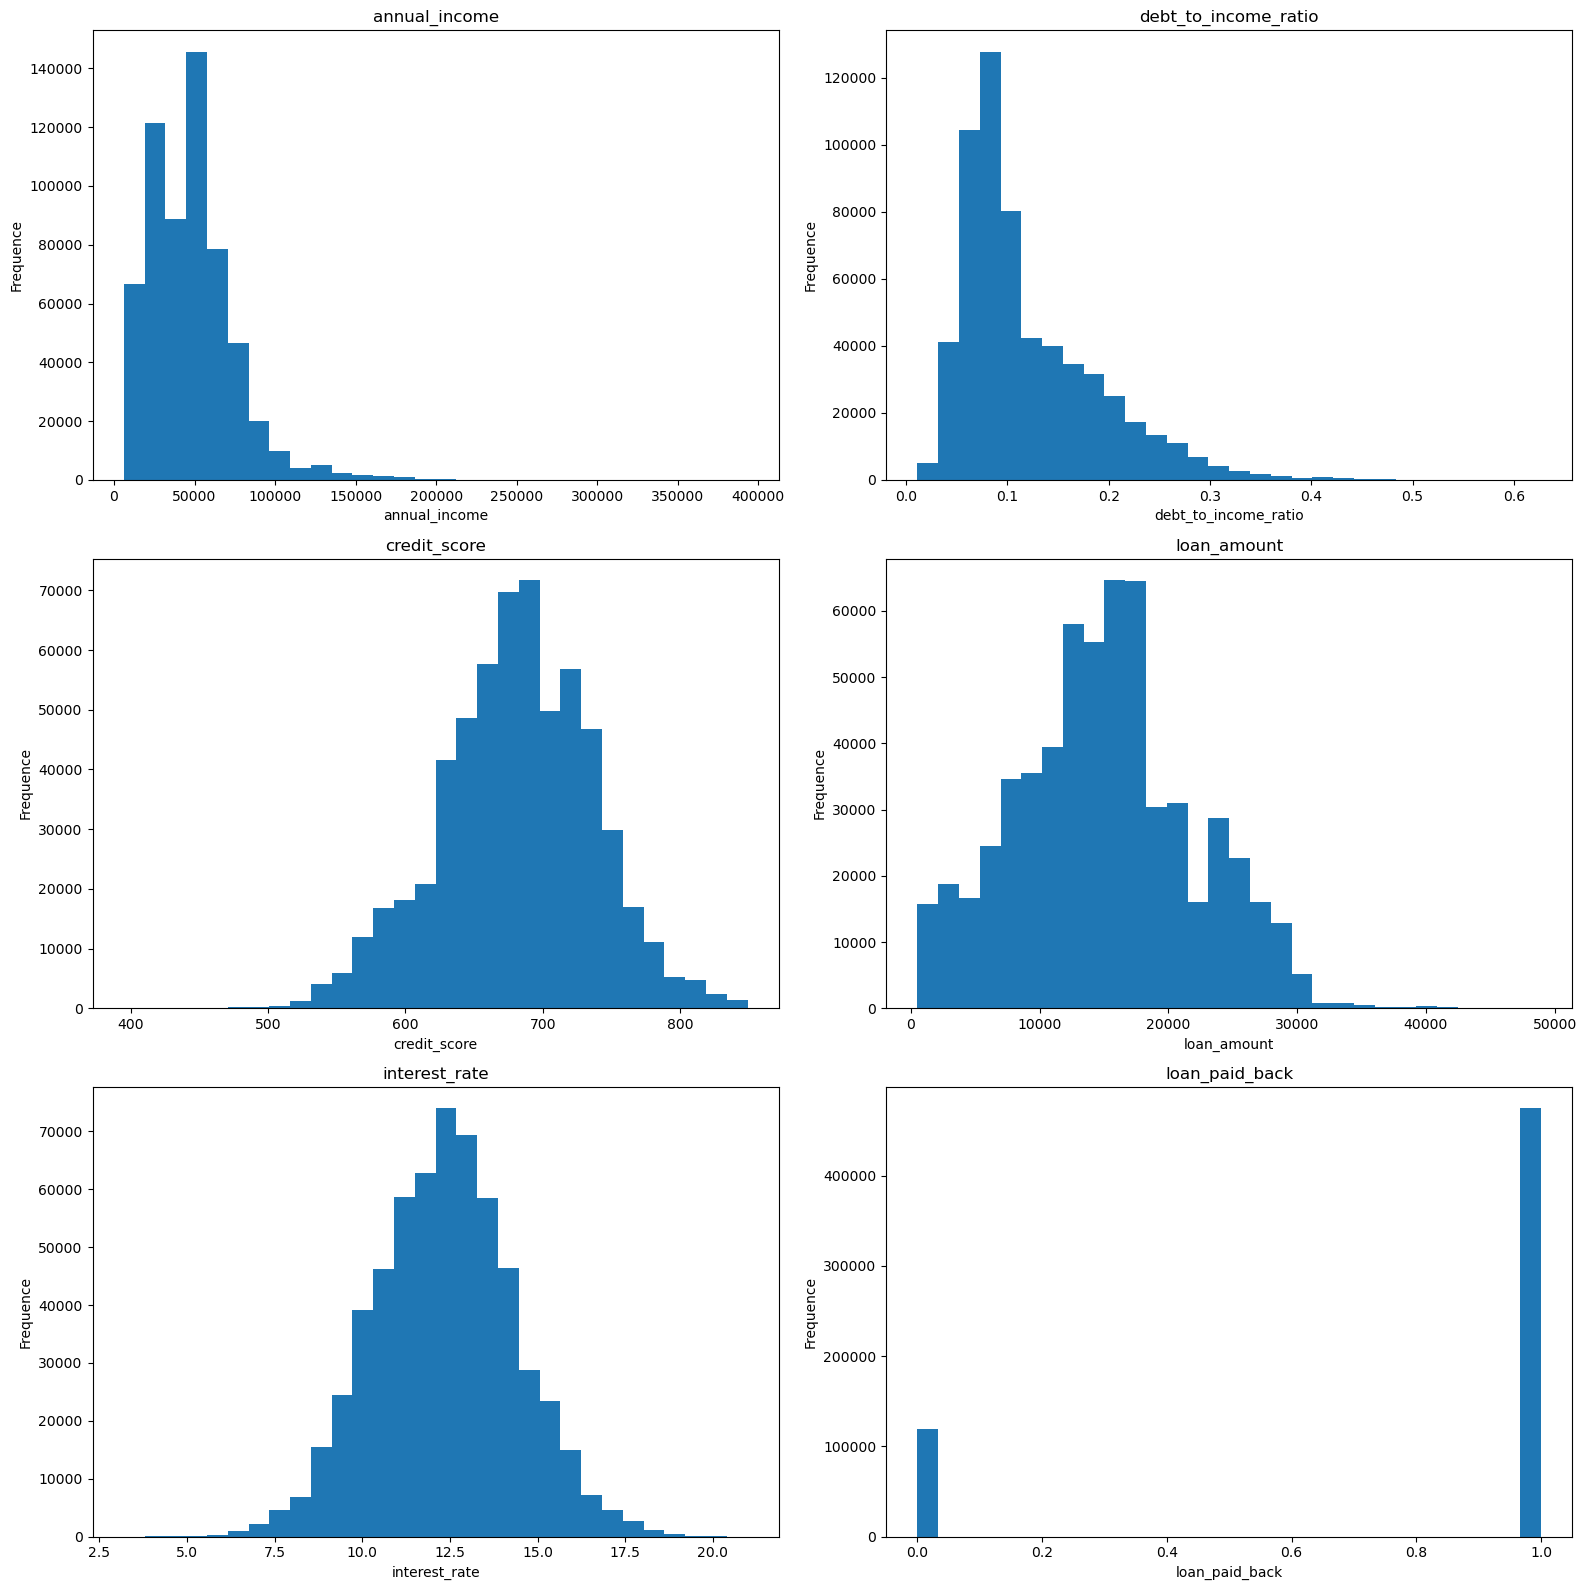

In [12]:
# Visualisation des variables numeriques
fig, axs = plt.subplots(3,2, figsize=(16,16))
quant_vars = df.select_dtypes(include = ['float64', 'int64'])

quant_vars = quant_vars.drop(columns=['id'])

for i, var in enumerate(quant_vars):
    row = i // 2
    col = i % 2
    axs[row,col].hist(x=df[var], bins = 30)
    axs[row,col].set_title(var)
    axs[row,col].set_xlabel(var)
    axs[row,col].set_ylabel('Frequence')

plt.tight_layout()
plt.show()

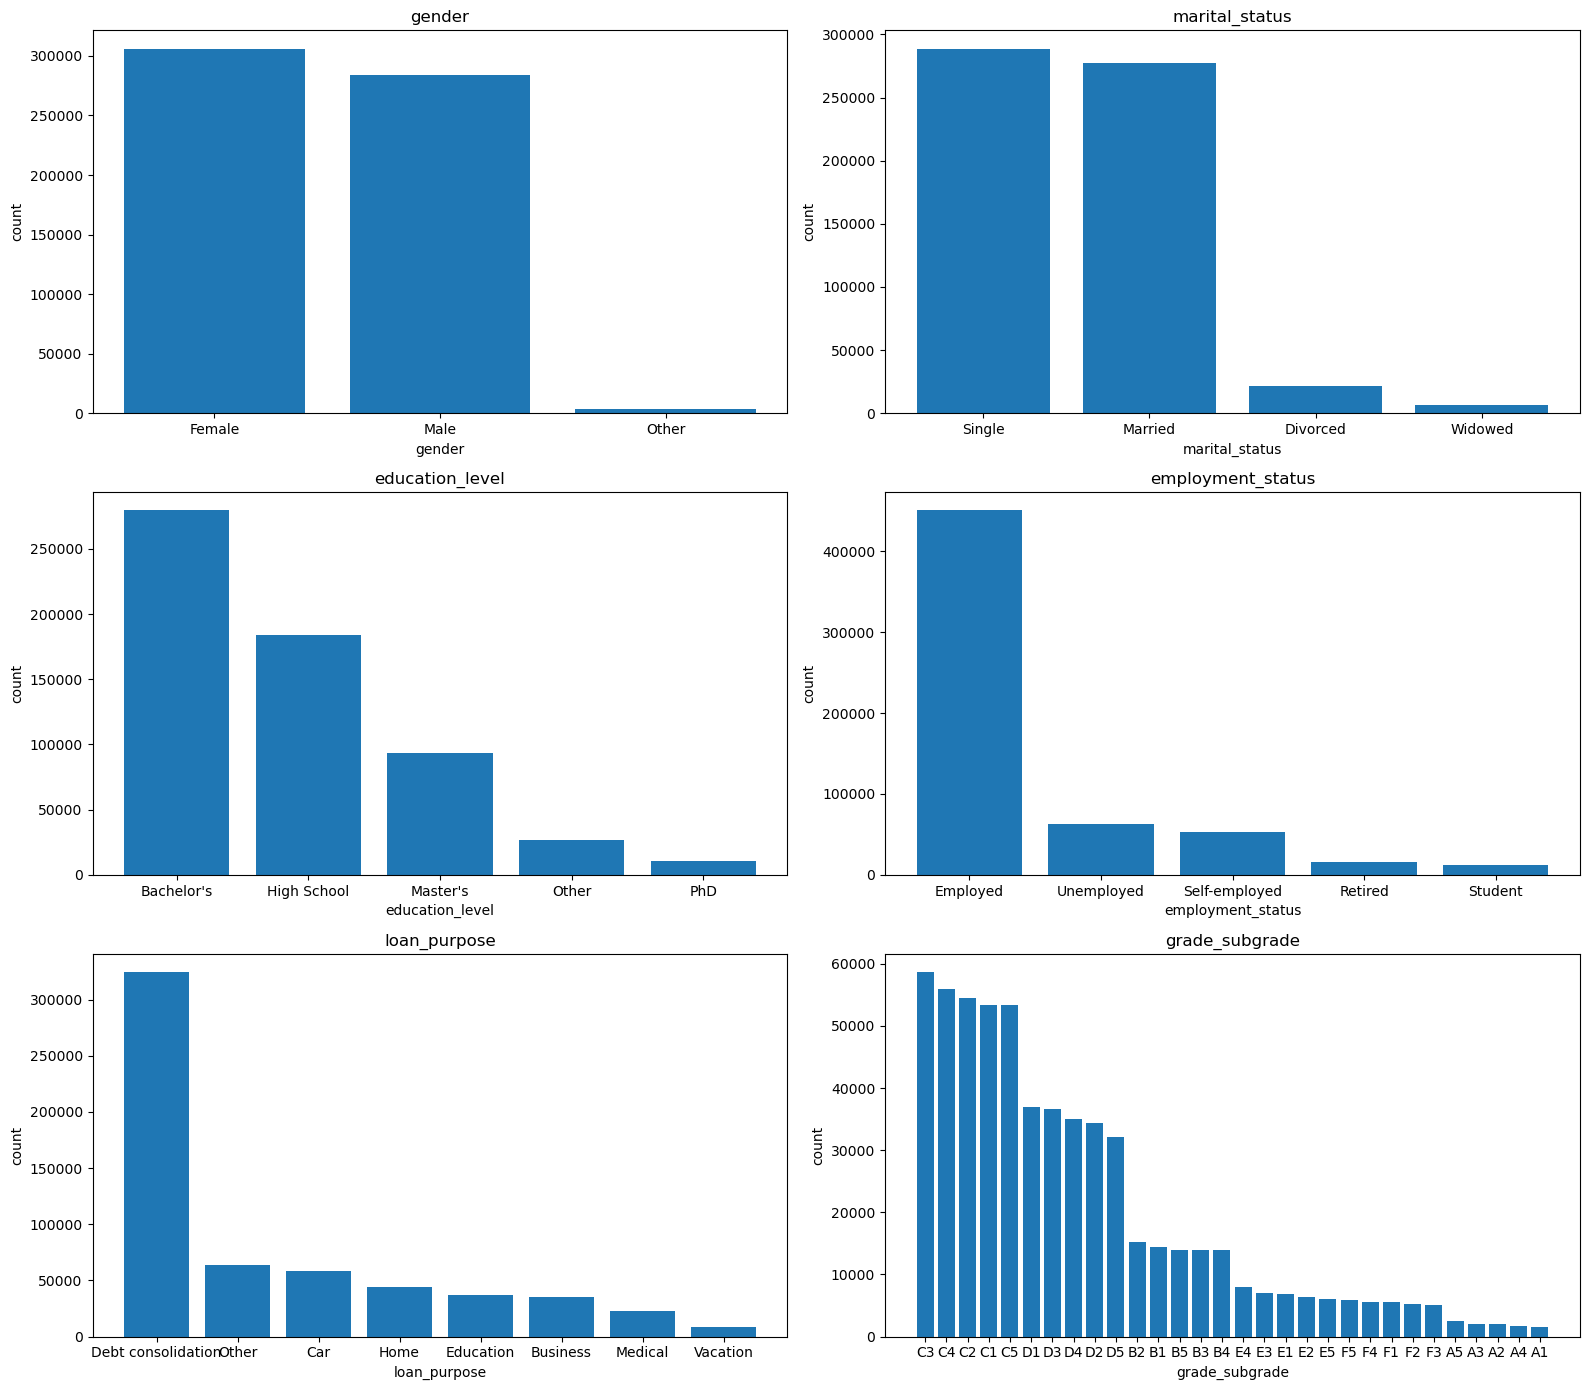

In [14]:
# Visualisation des variables categorielles
fig, axes = plt.subplots(3,2, figsize = (16,14))

quali_vars = df.select_dtypes(include = ['object'])

for i, var in enumerate(quali_vars):
    row = i // 2
    col = i % 2
    counts = df[var].value_counts()
    axes[row, col].bar(counts.index, counts.values)
    axes[row, col].set_title(var)
    axes[row, col].set_xlabel(var)
    axes[row, col].set_ylabel('count')

plt.tight_layout()
plt.show()

## Analyse bivarié

In [ ]:
#sns.pairplot(quant_vars)

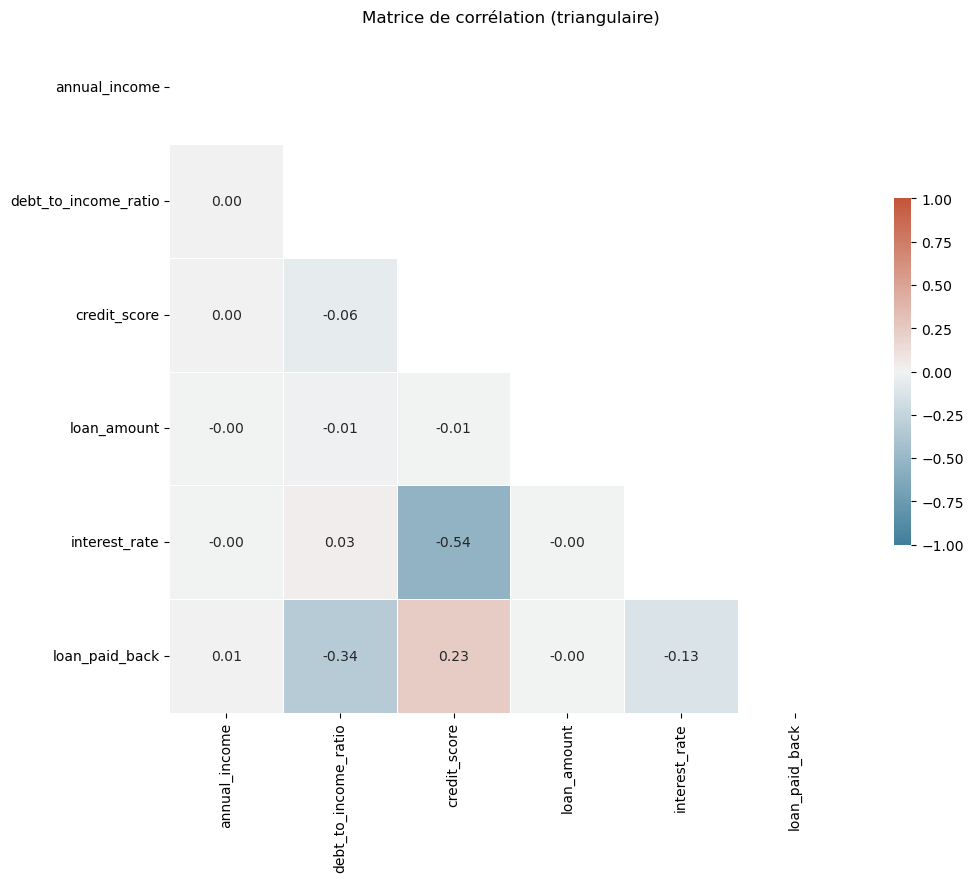

In [15]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Calcul de la matrice de corrélation
corr = quant_vars.corr()

# Masquer la partie supérieure (triangle)
mask = np.triu(np.ones_like(corr, dtype=bool))

# Créer la figure
f, ax = plt.subplots(figsize=(11, 9))

# Palette de couleurs divergente
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Tracer la heatmap
sns.heatmap(
    corr,
    mask=mask,
    cmap=cmap,
    vmax=1,           # maximum de l’échelle (valeur absolue)
    vmin=-1,          # minimum
    center=0,         # centre sur 0
    square=True,      # cases carrées
    linewidths=.5,    # lignes de séparation
    annot=True,       # affiche les valeurs numériques
    fmt=".2f",        # 2 décimales
    cbar_kws={"shrink": .5}  # taille de la barre de couleur
)

plt.title("Matrice de corrélation (triangulaire)")
plt.show()

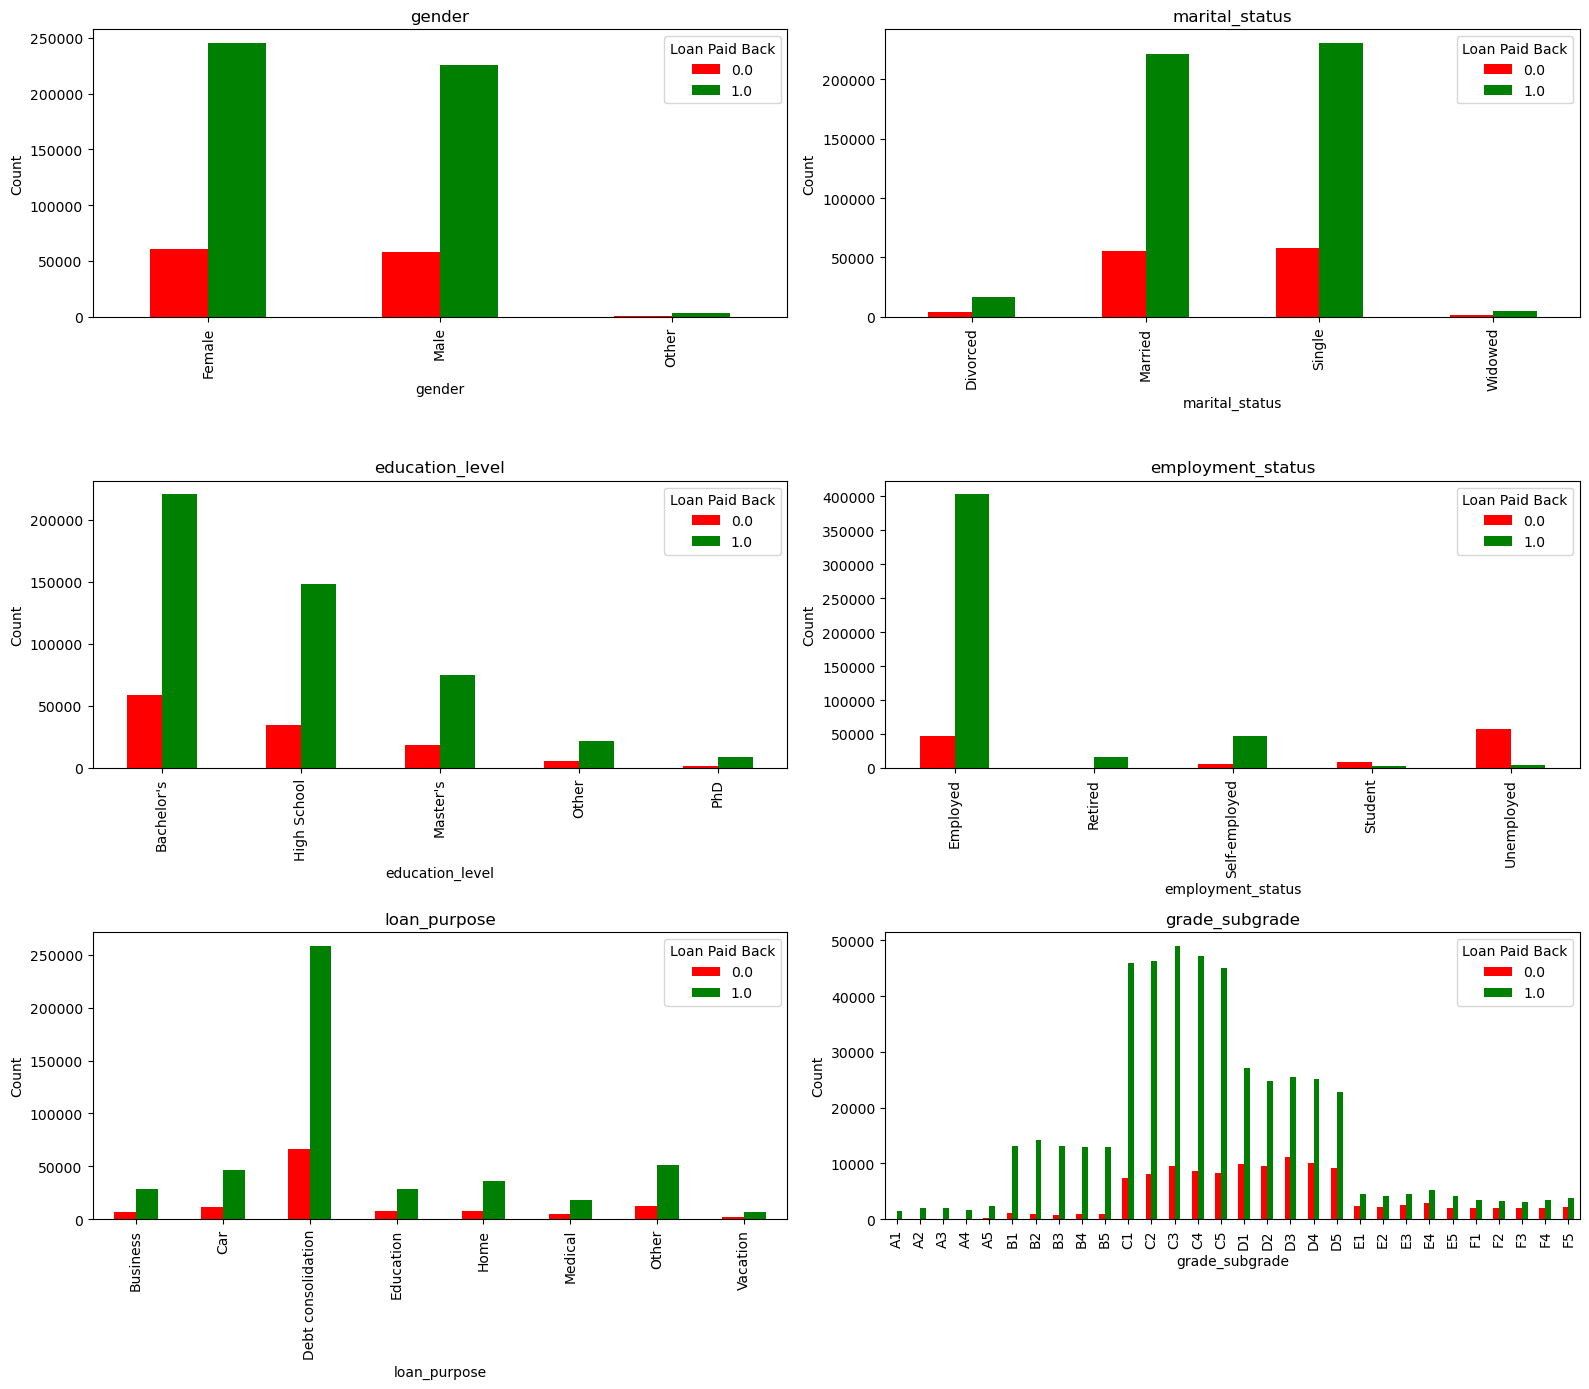

In [16]:
fig, axes = plt.subplots(3, 2, figsize=(16, 14))
quali_vars = df.select_dtypes(include=['object'])

for i, var in enumerate(quali_vars):
    row = i // 2
    col = i % 2
    
    # Compter le nombre d'occurrences par catégorie et par loan_paid_back
    counts = df.groupby([var, 'loan_paid_back']).size().unstack(fill_value=0)
    
    # Bar plot côte-à-côte
    counts.plot(kind='bar', ax=axes[row, col], color=['red', 'green'])
    
    axes[row, col].set_title(var)
    axes[row, col].set_xlabel(var)
    axes[row, col].set_ylabel('Count')
    axes[row, col].legend(title='Loan Paid Back')

plt.tight_layout()
plt.show()

## Split des données

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Supposons que df_train est votre DataFrame
# df_train = pd.read_csv('votre_dataset.csv')  # Exemple pour charger un dataset

# Spécifiez les colonnes cibles (y) et les features (X)
X = df.drop(['id','loan_paid_back'], axis=1)  # Remplacez 'colonne_cible' par le nom de votre colonne cible
y = df['loan_paid_back']

# Effectuez le split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

## Pre-processing des données

### Encodage des variables catégorielles

In [19]:
from sklearn.preprocessing import LabelEncoder

# 1. Mapping manuel pour l'éducation (Globalement sûr)
edu_mapping = {'High School': 0, "Bachelor's": 1, "Master's": 2, 'PhD': 3, 'Other': 4}

X_train['education_level_ord'] = X_train['education_level'].map(edu_mapping)
X_test['education_level_ord'] = X_test['education_level'].map(edu_mapping)

# 2. Label Encoding pour grade_subgrade (Fit sur Train uniquement)
le = LabelEncoder()
X_train['grade_subgrade_le'] = le.fit_transform(X_train['grade_subgrade'])

# On utilise .transform sur le test pour utiliser les mêmes correspondances
X_test['grade_subgrade_le'] = le.transform(X_test['grade_subgrade'])

# 3. Supprimer les colonnes texte d'origine
cols_to_drop = ['education_level', 'grade_subgrade']
X_train = X_train.drop(columns=cols_to_drop)
X_test = X_test.drop(columns=cols_to_drop)

print("Transformations terminées avec succès !")

Transformations terminées avec succès !


In [20]:
X_train

,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,gender,marital_status,employment_status,loan_purpose,education_level_ord,grade_subgrade_le
469875,104564.65,0.058,641,14953.89,12.88,Female,Single,Employed,Vacation,2,16
180615,97573.66,0.160,741,10874.21,10.09,Female,Single,Employed,Car,1,5
19755,44712.52,0.061,617,1420.12,15.25,Female,Single,Unemployed,Car,1,15
19532,92432.16,0.073,641,15207.27,12.73,Female,Married,Self-employed,Debt consolidation,1,15
546365,24891.02,0.329,732,4355.03,12.47,Male,Married,Employed,Education,1,10
...,...,...,...,...,...,...,...,...,...,...,...
110268,63490.98,0.063,668,16960.02,9.89,Male,Married,Employed,Debt consolidation,1,16
259178,49384.88,0.082,659,7862.06,12.62,Male,Single,Employed,Education,0,18
365838,38999.04,0.111,703,19900.32,11.08,Male,Single,Unemployed,Debt consolidation,1,10
131932,53920.25,0.050,626,20306.85,14.29,Male,Single,Employed,Car,4,18


In [21]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# 1. Initialiser l'encodeur
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False, drop='first')
categorical_cols = ['gender', 'marital_status', 'employment_status', 'loan_purpose']

# 2. FIT + TRANSFORM sur X_train
encoded_train = encoder.fit_transform(X_train[categorical_cols])
encoded_train_df = pd.DataFrame(encoded_train, columns=encoder.get_feature_names_out(categorical_cols), index=X_train.index)

# 3. TRANSFORM uniquement sur X_test (utilise les catégories apprises sur le train)
encoded_test = encoder.transform(X_test[categorical_cols])
encoded_test_df = pd.DataFrame(encoded_test, columns=encoder.get_feature_names_out(categorical_cols), index=X_test.index)

# 4. Supprimer les colonnes d'origine et concaténer les nouvelles
X_train = pd.concat([X_train.drop(columns=categorical_cols), encoded_train_df], axis=1)
X_test = pd.concat([X_test.drop(columns=categorical_cols), encoded_test_df], axis=1)

print("Encodage One-Hot terminé !")

Encodage One-Hot terminé !


### Normalisation des variables numériques

In [22]:
from sklearn.preprocessing import StandardScaler

# 1. Initialiser le scaler
scaler = StandardScaler()

num_vars = ['annual_income', 'debt_to_income_ratio', 'credit_score', 'loan_amount', 'interest_rate']

# 2. FIT + TRANSFORM sur X_train
# On transforme et on reconstruit le DataFrame avec l'index d'origine
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

# 3. TRANSFORM uniquement sur X_test
# On utilise les statistiques (moyenne/écart-type) apprises sur le train
X_test[num_vars] = scaler.transform(X_test[num_vars])

print("Mise à l'échelle (StandardScaler) terminée !")

Mise à l'échelle (StandardScaler) terminée !


In [23]:
X_train

,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,education_level_ord,grade_subgrade_le,gender_Male,gender_Other,marital_status_Married,...,employment_status_Self-employed,employment_status_Student,employment_status_Unemployed,loan_purpose_Car,loan_purpose_Debt consolidation,loan_purpose_Education,loan_purpose_Home,loan_purpose_Medical,loan_purpose_Other,loan_purpose_Vacation
469875,2.111095,-0.914687,-0.720766,-0.009421,0.260908,2,16,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
180615,1.849195,0.572830,1.083350,-0.598339,-1.128456,1,5,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
19755,-0.131121,-0.870937,-1.153754,-1.963072,1.441121,1,15,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
19532,1.656581,-0.695935,-0.720766,0.027155,0.186211,1,15,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
546365,-0.873686,3.037442,0.920980,-1.539407,0.056736,1,10,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110268,0.572369,-0.841770,-0.233654,0.280171,-1.228052,1,16,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
259178,0.043918,-0.564683,-0.396025,-1.033154,0.131433,0,18,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
365838,-0.345163,-0.141762,0.397786,0.704614,-0.635456,1,10,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
131932,0.213824,-1.031355,-0.991383,0.763298,0.963060,4,18,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
X_train.shape

(534594, 23)

## Entraînement du modèle

In [42]:
from sklearn.model_selection import train_test_split

# On divise le X_train actuel pour obtenir un set de validation
# 0.1 ici signifie 10% du X_train (ce qui reste représentatif vu ton volume de données)
X_test_final, X_val, y_test_final, y_val = train_test_split(
    X_test, y_test, 
    test_size=0.7, 
    random_state=42, 
    stratify=y_test
)

print(f"Taille finale Entraînement : {X_test_final.shape[0]}")
print(f"Taille Validation : {X_val.shape[0]}")
print(f"Taille Test (inchangé) : {X_test.shape[0]}")

Taille finale Entraînement : 17820
Taille Validation : 41580
Taille Test (inchangé) : 59400


In [ ]:
!conda install -c conda-forge xgboost -y

In [68]:
from xgboost import XGBClassifier

# Initialisation de XGBoost avec des paramètres robustes
xgb_model = XGBClassifier(
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    tree_method='hist',
    random_state=42
)

# Entraînement
xgb_model.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    verbose=100
)

[0]	validation_0-logloss:0.48144
[100]	validation_0-logloss:0.25197
[200]	validation_0-logloss:0.24885
[300]	validation_0-logloss:0.24759
[400]	validation_0-logloss:0.24660
[500]	validation_0-logloss:0.24592
[600]	validation_0-logloss:0.24548
[700]	validation_0-logloss:0.24535
[800]	validation_0-logloss:0.24540
[900]	validation_0-logloss:0.24530
[999]	validation_0-logloss:0.24528


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


## Evaluation du modele

In [69]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.preprocessing import label_binarize

# Prédire les probabilités sur l'ensemble de test
y_prob = xgb_model.predict_proba(X_test)[:, 1]  # Prendre les probabilités de la classe positive

# Évaluer avec AUC-ROC

roc_auc = roc_auc_score(y_test, y_prob)

# Calculer la matrice de confusion et le rapport de classification
y_pred = xgb_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Afficher les résultats
print('Matrice de confusion :\n', conf_matrix)
print('Rapport de classification :\n', class_report)
print(f'Aire sous la courbe ROC : {roc_auc:.2f}')

Matrice de confusion :
 [[ 7360  4693]
 [  999 46348]]
Rapport de classification :
               precision    recall  f1-score   support

         0.0       0.88      0.61      0.72     12053
         1.0       0.91      0.98      0.94     47347

    accuracy                           0.90     59400
   macro avg       0.89      0.79      0.83     59400
weighted avg       0.90      0.90      0.90     59400

Aire sous la courbe ROC : 0.92


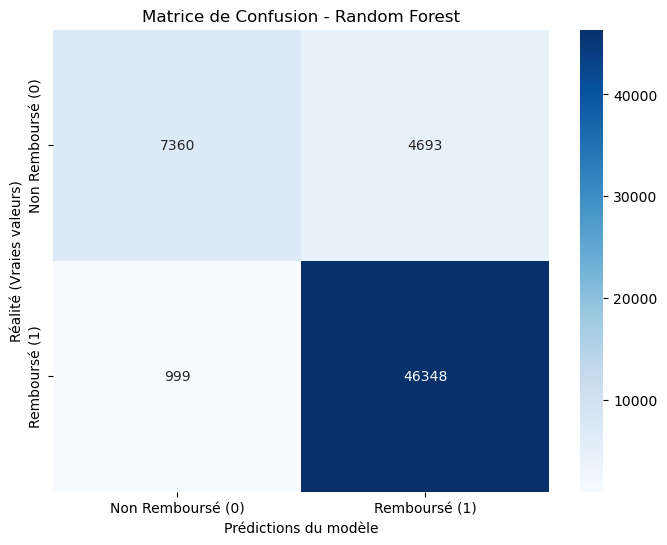

In [70]:
# 1. Définir la taille de la figure
plt.figure(figsize=(8, 6))

# 2. Créer la heatmap avec Seaborn
sns.heatmap(conf_matrix, 
            annot=True,      # Affiche les nombres dans les cases
            fmt='d',         # Format entier (évite les notations scientifiques)
            cmap='Blues',    # Palette de couleurs bleues
            xticklabels=['Non Remboursé (0)', 'Remboursé (1)'], 
            yticklabels=['Non Remboursé (0)', 'Remboursé (1)'])

# 3. Ajouter des labels pour la clarté
plt.xlabel('Prédictions du modèle')
plt.ylabel('Réalité (Vraies valeurs)')
plt.title('Matrice de Confusion - Random Forest')
plt.show()

## Importance des features

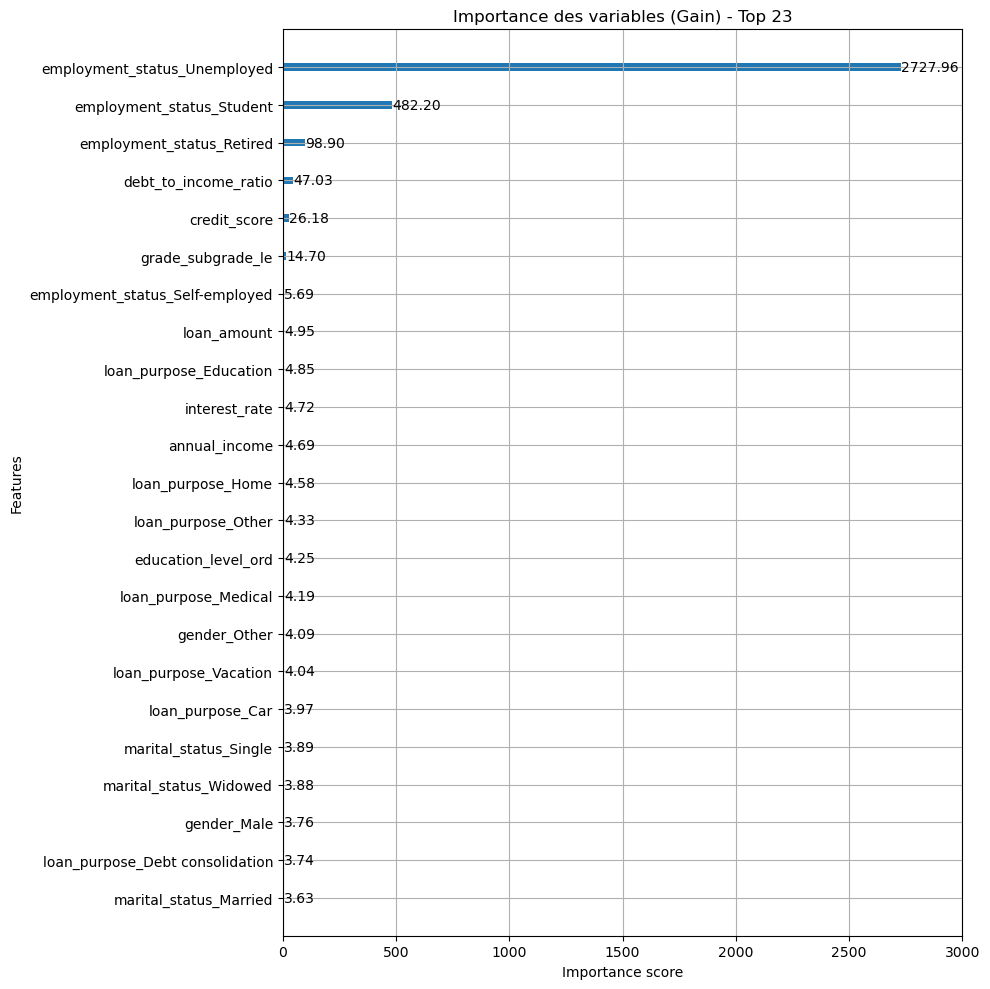

In [75]:
# 1. Créer le graphique
fig, ax = plt.subplots(figsize=(10, 10))
# On stocke le graphique dans 'ax'
xgb.plot_importance(xgb_model, max_num_features=23, ax=ax, importance_type='gain', show_values=True)

# 2. Formater les chiffres sur les barres (2 chiffres après la virgule)
for text in ax.texts:
    val = float(text.get_text())
    text.set_text(f'{val:.2f}')

# 3. Améliorer le titre et l'affichage
plt.title("Importance des variables (Gain) - Top 23")
plt.tight_layout()
plt.show()

#### Analyse de l'importance des variables
Nous avons abouti à une structure décisionnelle très marquée, dominée par le statut professionnel de l'emprunteur. Le fait d'être sans emploi ou étudiant apparaît comme le prédicteur le plus discriminant : le gain apporté par la variable employment_status_Unemployed surpasse de loin tous les autres critères, indiquant que le modèle a identifié un seuil de risque critique lié à l'absence de revenus fixes. Suite à ce filtre majeur, nous observons que le modèle s'appuie sur la cohérence financière classique, notamment le ratio d'endettement (debt_to_income_ratio) et la fiabilité historique via le credit_score. Il est intéressant de noter que les variables démographiques (genre, statut marital) et les motifs spécifiques du prêt (vacances, voiture, etc.) n'exercent qu'une influence marginale. Cette hiérarchie démontre que notre modèle privilégie la capacité de remboursement immédiate et la santé financière structurelle plutôt que des facteurs comportementaux ou personnels.

#### Suggestions d'améliorations futures
Pour franchir un nouveau palier de performance, nous devrions nous concentrer sur l'ingénierie de variables croisées afin de briser la domination monotone du statut d'emploi. Une piste prometteuse consisterait à créer des ratios d'interaction, comme le revenu par rapport au montant du prêt pondéré par le score de crédit, pour nuancer le profil des emprunteurs "moyens". Nous pourrions également explorer l'utilisation d'algorithmes de "Target Encoding" sur les variables catégorielles à haute cardinalité pour capturer des nuances plus fines que le simple One-Hot Encoding. Enfin, l'implémentation d'une approche d'ensemble (Stacking), combinant notre XGBoost actuel avec un modèle de type LightGBM ou un réseau de neurones tabulaire, permettrait probablement de capturer les signaux résiduels que les arbres de décision ne parviennent pas à isoler, optimisant ainsi notre AUC-ROC finale.

## Sauvegarde du modèle

In [ ]:
# Sauvegarde finale du modèle XGBoost
xgb_model.save_model("../models/xgboost_credit_scoring_final.json")

print("Modèle sauvegardé avec succès sous le nom 'xgboost_credit_scoring_final.json'")

Modèle sauvegardé avec succès sous le nom 'xgboost_credit_scoring_final.json'


## Chargement du modele

In [ ]:
import xgboost as xgb
import numpy as np

# Créer une nouvelle instance de modèle vide
xgb_test = xgb.XGBClassifier()

# Charger le fichier sauvegardé
xgb_test.load_model("../models/xgboost_credit_scoring_final.json")

# Comparer les prédictions (Probabilités)
original_preds = xgb_model.predict_proba(X_test)[:5]
reloaded_preds = xgb_test.predict_proba(X_test)[:5]

print("--- TEST DE COHÉRENCE ---")
print(f"Prédictions originales :\n {original_preds}")
print(f"Prédictions rechargées :\n {reloaded_preds}")

# Vérification stricte
if np.allclose(original_preds, reloaded_preds):
    print("\nSuccès : Le modèle rechargé est identique au modèle original !")
else:
    print("\nErreur : Les prédictions diffèrent.")

--- TEST DE COHÉRENCE ---
Prédictions originales :
 [[1.5286213e-01 8.4713787e-01]
 [4.1872263e-04 9.9958128e-01]
 [6.1607087e-01 3.8392910e-01]
 [1.9878078e-01 8.0121922e-01]
 [1.1316717e-02 9.8868328e-01]]
Prédictions rechargées :
 [[1.5286213e-01 8.4713787e-01]
 [4.1872263e-04 9.9958128e-01]
 [6.1607087e-01 3.8392910e-01]
 [1.9878078e-01 8.0121922e-01]
 [1.1316717e-02 9.8868328e-01]]

Succès : Le modèle rechargé est identique au modèle original !
